## Key Motivation for the Project

I decided to grow my Datascience skills by engaging in diabetes prediction. I did this not only for fun and to learn but also to appreciate the essence of datascience in solving some of the problems that plague humanity. 

Let's start by importing the libraries that I will be using.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Loading and reading the datasets

In [2]:
#Reading the dataset

dataset = pd.read_csv('diabetes.csv')

Exploration of data 

In [3]:
# printing first fifteen rows

dataset.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Printing the shape of dataset

dataset.shape

(768, 9)

In [5]:
#Printing the description of dataset

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Printing the Information related to dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Printing the columns in the datasets

dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Printing the datatypes of columns in the datasets

dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
#Check missing values

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#check correlations

dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Training and test or validation dataset

Training set- A subset to train a model.

Test set- A subset to test the trained model.

Now I will Load the training and test or validation dataset

In [12]:
# loading the data 

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
# shape of training and testing data

train.shape, test.shape

((768, 9), (768, 8))

In [14]:
# printing first five rows in training dataset

train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# printing first five rows in test dataset

test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
# columns in the training dataset

train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
# columns in the test dataset

test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [18]:
# Data type of the columns

train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Analysis of dataset

I have analyse and visualize the dataset using analysis methods.

It includes two analysis methods-

1.Univariate analysis

2.Bivariate analysis

# Univariate analysis

Now Let's look at the distribution of our target variable, i.e. Outcome. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [19]:
train['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
# Normalize can be set to True to print proportions instead of number

train['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot:>

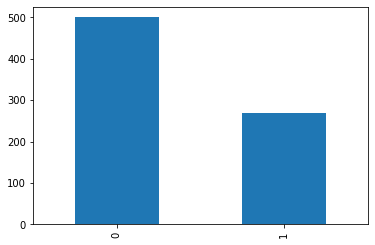

In [21]:
# plotting the bar plot of frequencies

train['Outcome'].value_counts().plot.bar()

So, 268 users out of total 768 have diabetes Outcome which is around 34%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group.

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

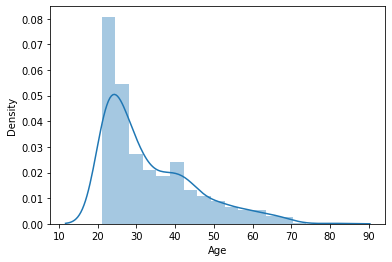

In [22]:
sn.distplot(train["Age"])

<AxesSubplot:xlabel='Outcome'>

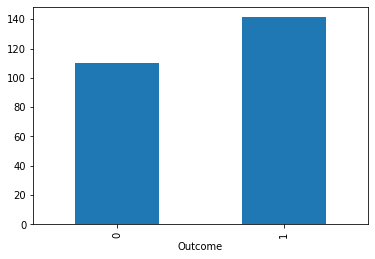

In [23]:
train.groupby('Outcome')['Glucose'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

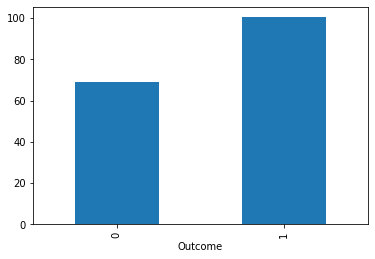

In [24]:
train.groupby('Outcome')['Insulin'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

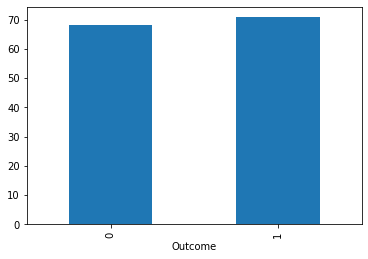

In [25]:
train.groupby('Outcome')['BloodPressure'].mean().plot.bar()

<AxesSubplot:xlabel='Outcome'>

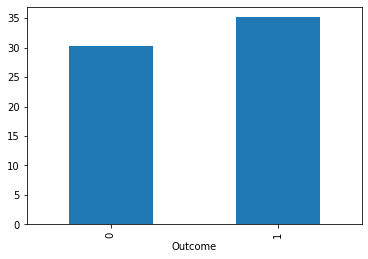

In [26]:
train.groupby('Outcome')['BMI'].mean().plot.bar()

## Bivariate Analysis

<AxesSubplot:xlabel='Outcome', ylabel='count'>

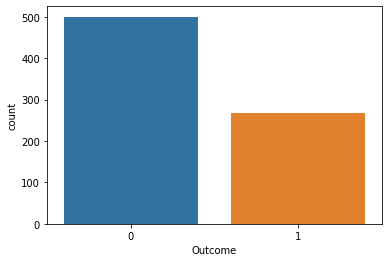

In [27]:
#Plotting the distribution of Outcome

sn.countplot(x='Outcome', data = train)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


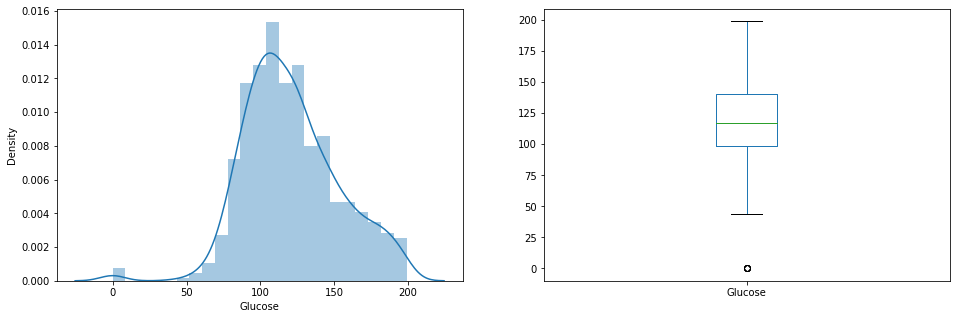

In [28]:
plt.figure(1)
plt.subplot(121), sn.distplot(train['Glucose'])
plt.subplot(122), train['Glucose'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


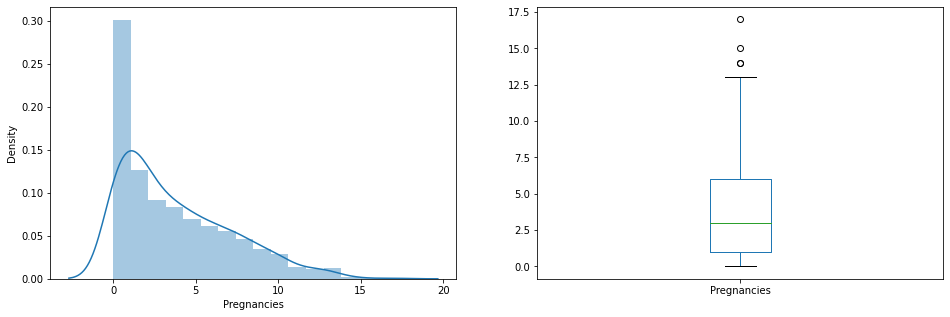

In [29]:
plt.figure(2)
plt.subplot(121), sn.distplot(train['Pregnancies'])
plt.subplot(122), train['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


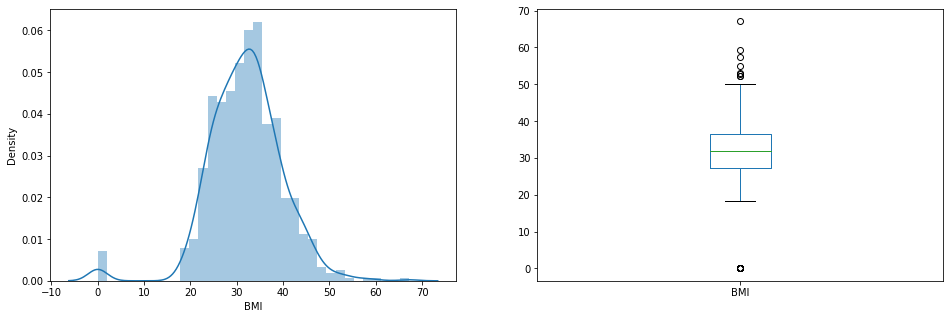

In [30]:
plt.subplot(121), sn.distplot(train['BMI'])
plt.subplot(122), train['BMI'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


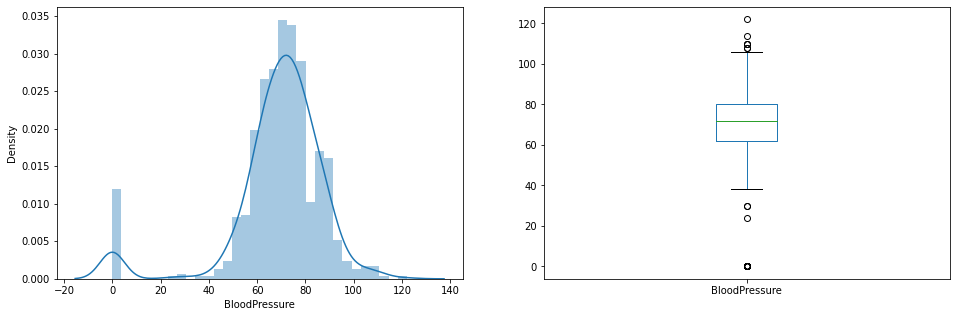

In [31]:
plt.subplot(121), sn.distplot(train['BloodPressure'])
plt.subplot(122), train['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


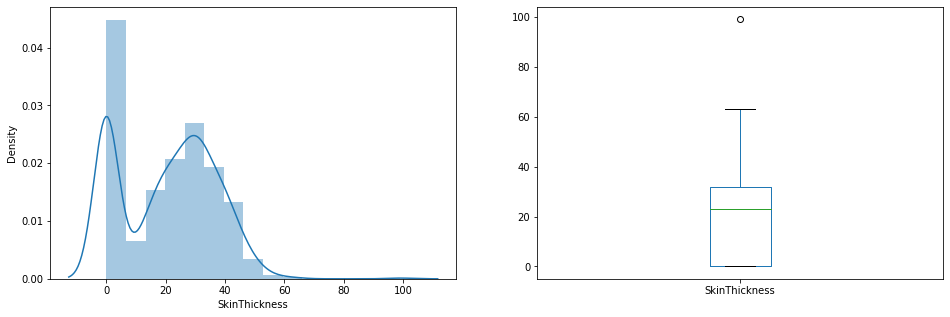

In [32]:
plt.subplot(121), sn.distplot(train['SkinThickness'])
plt.subplot(122), train['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


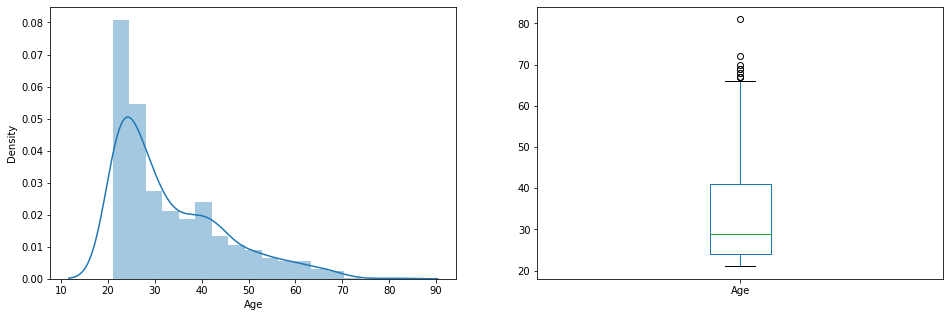

In [33]:
plt.subplot(121), sn.distplot(train['Age'])
plt.subplot(122), train['Age'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


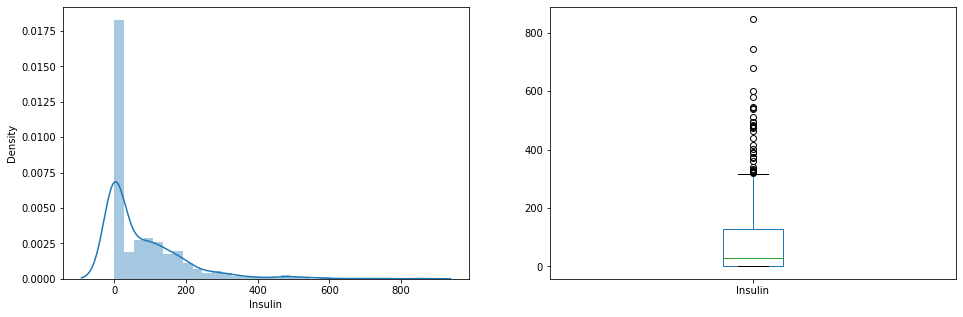

In [34]:
plt.subplot(121), sn.distplot(train['Insulin'])
plt.subplot(122), train['Insulin'].plot.box(figsize=(16,5))
plt.show()

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


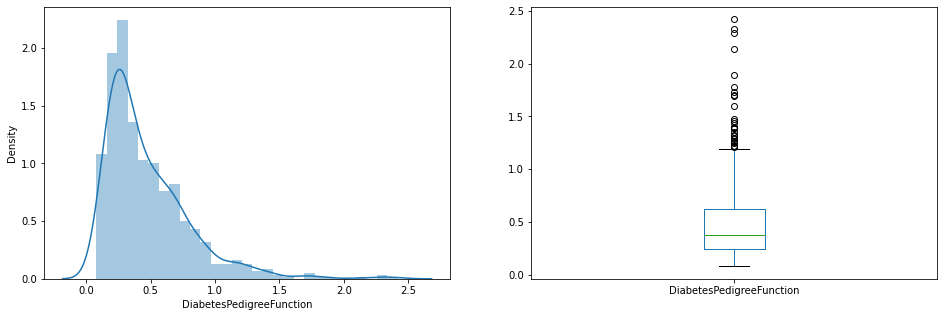

In [35]:
plt.subplot(121), sn.distplot(train['DiabetesPedigreeFunction'])
plt.subplot(122), train['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

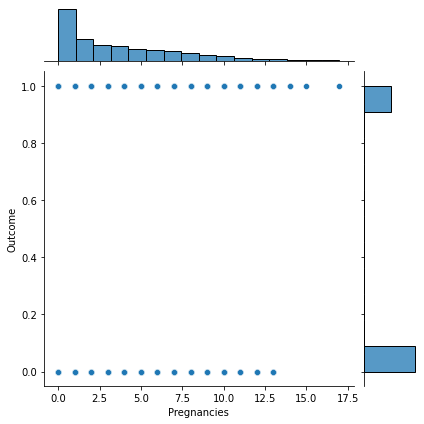

In [36]:
sn.jointplot(x='Pregnancies', y='Outcome', data=train)

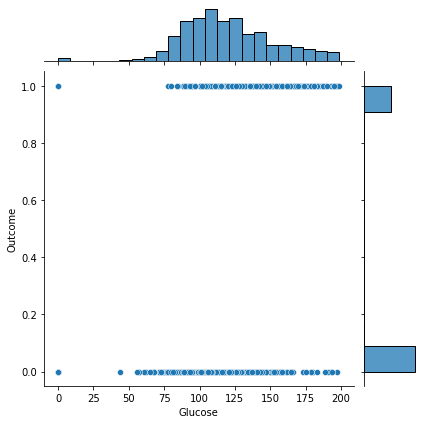

In [37]:
sn.jointplot(x='Glucose', y='Outcome', data=train)

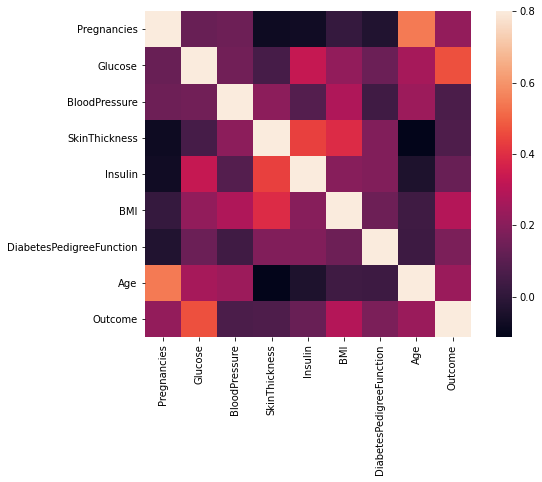

In [38]:
matrix = train.corr() 
ax = plt.subplots(figsize=(9, 6)), sn.heatmap(matrix, vmax=.8, square=True, cmap="rocket")

In [39]:
#Check missing values

train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the train dataset. 

Next, we will start to build our predictive model to predict whether a patient have diabetes or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [40]:
target = train['Outcome']
train = train.drop('Outcome',1)

In [41]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build the model. I will split the train data into training and validation set so that I will be able to validate the results of our model on the validation set. I will keep 20% data as validation set and rest as the training set. 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
# defining the logistic regression model

lreg = LogisticRegression()

In [46]:
# fitting the model on  X_train and y_train

lreg.fit(X_train,y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# making prediction on the validation set

prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
# calculating the accuracy score

accuracy_score(y_val, prediction)

0.8116883116883117

We got an accuracy score of around 81% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that.

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score

clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [52]:
# fitting the decision tree model

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [53]:
# making prediction on the validation set

predict = clf.predict(X_val)

In [54]:
# calculating the accuracy score

accuracy_score(y_val, predict)

0.7337662337662337

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
#defining the random forest classifier with estimators 200

rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
# making prediction on the validation set

predict = rfc.predict(X_val)

In [59]:
# calculating the accuracy score

accuracy_score(y_val, predict)

0.8116883116883117

## XGBClassifier

In [60]:
from xgboost import XGBClassifier

In [61]:
xgb = XGBClassifier(gamma=0)

In [62]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
# making prediction on the validation set

predict = xgb.predict(X_val)

In [64]:
# calculating the accuracy score

accuracy_score(y_val, predict)

0.7402597402597403

After applying all these models we found out the best model to be Logistic Regression with the accuracy of 81%. So will apply this model for prediction